In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sms 

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC # Support Vector Classifier

In [4]:
cancer = load_breast_cancer()

In [9]:
X_df = pd.DataFrame(
    cancer.data,
    columns=cancer.feature_names)

In [10]:
X_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
y_df = pd.Series(
    cancer.target,
    name="target"
)

In [12]:
y_df

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [13]:
# Combine features and target
df = pd.concat([X_df, y_df], axis=1)

In [14]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [15]:
df["target_name"] = df["target"].map(
    dict(enumerate(cancer.target_names))
)
df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


In [16]:
df.shape


(569, 32)

In [30]:
X_df = cancer.data[:, :2]

In [31]:
svm = SVC(kernel="linear", C=1)
svm.fit(X_df, y_df)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


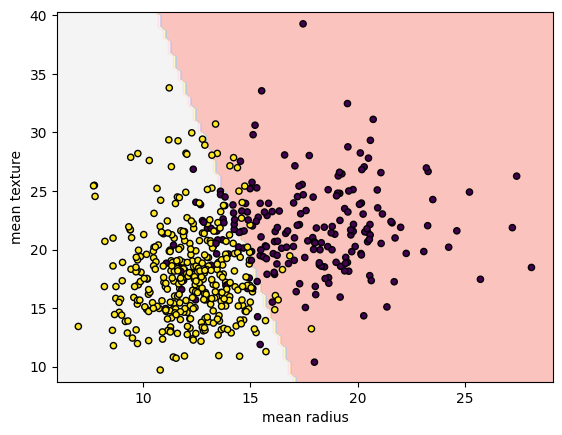

In [33]:
DecisionBoundaryDisplay.from_estimator(
        svm,
        X_df,
        response_method="predict",
        alpha=0.8,
        cmap="Pastel1",
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )
plt.scatter(X[:, 0], X[:, 1], 
            c=y, 
            s=20, edgecolors="k")
plt.show()

## DecisionBoundaryDisplay — Purpose and Use

### Purpose
`DecisionBoundaryDisplay` is a **visualization utility** in scikit-learn.  
It exists only to show **how a trained classifier divides feature space**.  
It does **not** train, evaluate, or improve a model.

---

### What It Displays
- Regions of the input space where the model predicts each class
- The boundary surface separating classes  
  - Straight line → linear model  
  - Curved surface → nonlinear model
- Model behavior, not data distribution

---

### How It Works Internally
1. Builds a dense grid over the feature space  
2. Feeds each grid point to the trained estimator  
3. Collects predictions or scores  
4. Colors regions based on those outputs  
5. Optionally overlays contours or filled regions

---

### Why It Exists
Before this utility, users had to manually:
- Create meshgrids
- Call `predict()` or `decision_function()`
- Reshape outputs
- Plot using `contourf`

`DecisionBoundaryDisplay` abstracts all of this boilerplate into a single call.

---

### When It Is Useful
- Understanding model geometry
- Comparing kernels (linear vs RBF vs polynomial)
- Debugging underfitting and overfitting
- Teaching classification intuition
- Verifying feature separability

---

### When It Is Not Useful
- High-dimensional analysis
- Model evaluation
- Performance comparison
- Production systems

---

### Key Methods
- `from_estimator()`  
  Uses a trained model directly.

- `from_predictions()`  
  Uses precomputed predictions or decision scores.

---

### Important Constraint
This visualization is meaningful only for **1D or 2D feature spaces**.  
Anything higher-dimensional is a projection, not the full model behavior.

---

### Mental Model
**DecisionBoundaryDisplay answers one question only:**  
> *“If the model had to decide everywhere in this plane, what would it decide?”*


# SVM (Support Vector Machine) — Function-Level Doubts & Clear Answers

## 1. What does `SVC()` actually do?
**Doubt:** `SVC()` kya karta hai internally?  
**Answer:**  
- Creates an SVM classifier object  
- Does **nothing** until `fit()` is called  
- Stores hyperparameters (kernel, C, gamma)

---

## 2. What happens in `svm.fit(X, y)`?
**Doubt:** `fit()` ke time kya hota hai?  
**Answer:**  
- Finds the **optimal separating hyperplane**
- Identifies **support vectors**
- Solves an optimization problem (handled by library, not you)

---

## 3. What is `kernel="linear"`?
**Doubt:** Kernel kya hota hai?  
**Answer:**  
- Kernel defines **how data is separated**
- `linear` → straight line / plane
- `rbf` → curved boundary
- Kernel = similarity function, not magic

---

## 4. What does parameter `C` mean?
**Doubt:** `C=1` ka role?  
**Answer:**  
- Controls **margin vs misclassification**
- High `C` → strict, less error, more overfitting
- Low `C` → wider margin, more tolerance

---

## 5. What does `svm.predict(X)` return?
**Doubt:** Predict output kya hota hai?  
**Answer:**  
- Returns **class labels** (0 or 1)
- Not probabilities (unless enabled)

---

## 6. What is `decision_function()`?
**Doubt:** Predict aur decision_function mein difference?  
**Answer:**  
- `predict()` → final class
- `decision_function()` → distance from hyperplane
- Sign = class, magnitude = confidence

---

## 7. Why `DecisionBoundaryDisplay.from_estimator()`?
**Doubt:** Ye function kya karta hai?  
**Answer:**  
- Creates a **2D mesh**
- Calls model’s `predict()` on grid
- Colors regions based on predicted class
- **Visualization only**, no ML logic

---

## 8. Why does SVM require scaling?
**Doubt:** Scaling kyu important hai?  
**Answer:**  
- SVM uses **distance calculations**
- Different feature scales break optimization
- Always scale before SVM in real use

---

## 9. Why does SVM fail with many features sometimes?
**Doubt:** High dimension mein issue kyu aata hai?  
**Answer:**  
- Memory heavy
- Slow on large datasets
- Kernel matrix grows fast
- Linear SVM preferred for large data

---

## 10. Why can’t we plot SVM trained on 30 features?
**Doubt:** Decision boundary sirf 2 features pe kyu?  
**Answer:**  
- Plot = 2D space only
- SVM itself works in any dimension
- Visualization ≠ algorithm capability

---

## 11. Is SVM used in industry today?
**Doubt:** Real projects mein SVM use hota hai?  
**Answer:**  
- Yes, for:
  - Text classification
  - Bioinformatics
  - Small–medium datasets
- Large data → tree models / deep learning

---

## 12. Do experts write SVM code from scratch?
**Doubt:** Expert khud SVM likhta hai?  
**Answer:**  
- No, they use sklearn / libsvm
- Writing solver = research task
- Production = correct usage, not reinvention

---


# SVM Code — Function-Level Doubts Explained

## Code Context
This code trains a **linear Support Vector Machine** on **two features** from the Breast Cancer dataset and **visualizes the decision boundary**.

---

## 1. Why `load_breast_cancer()`?
**Doubt:** Ye dataset kyu use kiya?  
**Answer:**  
- Preloaded, clean, labeled dataset
- Binary classification → perfect for SVM demo
- Industry use-case representation only

---

## 2. What does `X = cancer.data[:, :2]` mean?
**Doubt:** Sirf 2 features kyu?  
**Answer:**  
- Dataset has 30 features
- Decision boundary plot works **only in 2D**
- This slicing is **only for visualization**

---

## 3. What is `y = cancer.target`?
**Doubt:** `y` mein kya aa raha hai?  
**Answer:**  
- Class labels (0 = malignant, 1 = benign)
- Supervised learning target

---

## 4. What does `SVC(kernel="linear", C=1)` do?
**Doubt:** Yahan kya define ho raha hai?  
**Answer:**  
- Chooses **linear SVM**
- `C` controls margin strictness
- No training happens yet

---

## 5. What happens during `svm.fit(X, y)`?
**Doubt:** Fit ke time kya hota hai?  
**Answer:**  
- Finds optimal separating line
- Selects support vectors
- Solves optimization internally

---

## 6. Why no feature scaling here?
**Doubt:** SVM scaling kyu nahi kiya?  
**Answer:**  
- Demo code, not production
- Real-world SVM **must be scaled**

---

## 7. What does `DecisionBoundaryDisplay.from_estimator()` do?
**Doubt:** Ye ML ka part hai ya plotting?  
**Answer:**  
- Creates 2D grid
- Calls `svm.predict()` on grid
- Colors regions by class
- Visualization only

---

## 8. Why `response_method="predict"`?
**Doubt:** Predict hi kyu?  
**Answer:**  
- Uses class labels
- Alternative: `decision_function`
- Choice affects color shading only

---

## 9. Why pass `X` again to `from_estimator`?
**Doubt:** Model already trained hai na?  
**Answer:**  
- `X` defines **plotting range**
- Must match training feature dimensions

---

## 10. Why use `plt.scatter(X[:,0], X[:,1], c=y)`?
**Doubt:** Scatter ka role?  
**Answer:**  
- Plots actual data points
- Colors = true labels
- Helps compare prediction vs reality

---

## 11. Why does this code break with 30 features?
**Doubt:** Full dataset pe kyu error aata hai?  
**Answer:**  
- Decision boundary is 2D only
- SVM itself works in high dimensions
- Visualization limitation

---

## 12. Is this how SVM is used in industry?
**Doubt:** Industry mein bhi aisa hi hota hai?  
**Answer:**  
- Same SVM
- All features
- Scaling + CV
- No plotting

---

## Key Takeaway
- This code is for **intuition**
- SVM ≠ visualization
- Libraries handle math
- Understanding > memorization


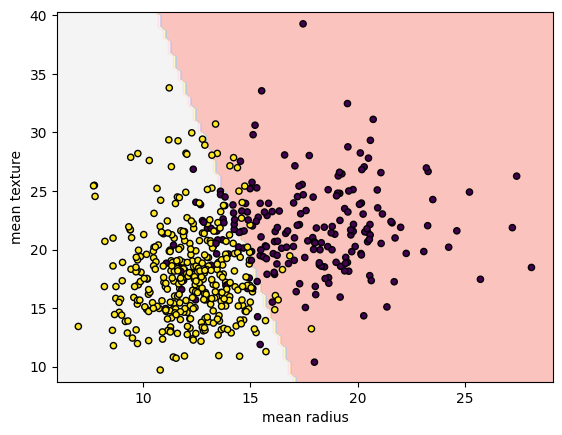

In [34]:
# gfg doc code 
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

svm = SVC(kernel="linear", C=1)
svm.fit(X, y)

DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        alpha=0.8,
        cmap="Pastel1",
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

plt.scatter(X[:, 0], X[:, 1], 
            c=y, 
            s=20, edgecolors="k")
plt.show()

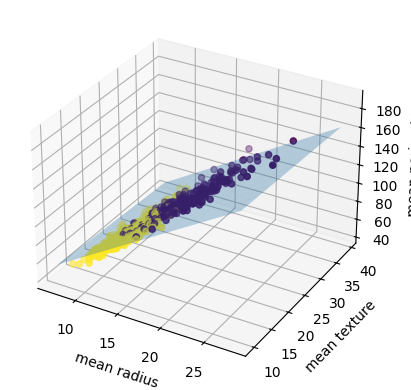

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load data
cancer = load_breast_cancer()
X = cancer.data[:, :3]   # take 3 features
y = cancer.target

# Train linear SVM
svm = SVC(kernel="linear")
svm.fit(X, y)

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X[:, 0], X[:, 1], X[:, 2],
    c=y,
    s=20
)

ax.set_xlabel(cancer.feature_names[0])
ax.set_ylabel(cancer.feature_names[1])
ax.set_zlabel(cancer.feature_names[2])

# Plot decision plane (linear SVM only)
w = svm.coef_[0]
b = svm.intercept_[0]

xx, yy = np.meshgrid(
    np.linspace(X[:,0].min(), X[:,0].max(), 10),
    np.linspace(X[:,1].min(), X[:,1].max(), 10)
)

zz = (-w[0]*xx - w[1]*yy - b) / w[2]

ax.plot_surface(xx, yy, zz, alpha=0.3)

plt.show()


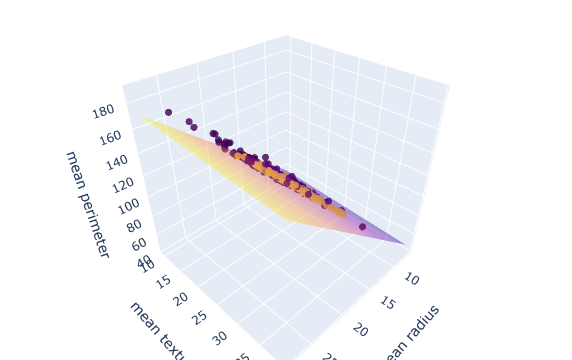

In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
import numpy as np
import plotly.graph_objects as go

# Load data
cancer = load_breast_cancer()
X = cancer.data[:, :3]   # 3 features
y = cancer.target

# Train linear SVM
svm = SVC(kernel="linear")
svm.fit(X, y)

# 3D scatter (samples)
scatter = go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    mode="markers",
    marker=dict(
        size=4,
        color=y,
        colorscale="Viridis",
        opacity=0.8
    ),
    name="Samples"
)

# Decision plane
w = svm.coef_[0]
b = svm.intercept_[0]

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 20),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
)

zz = (-w[0] * xx - w[1] * yy - b) / w[2]

plane = go.Surface(
    x=xx,
    y=yy,
    z=zz,
    opacity=0.4,
    showscale=False,
    name="Decision Plane"
)

fig = go.Figure(data=[scatter, plane])

fig.update_layout(
    scene=dict(
        xaxis_title=cancer.feature_names[0],
        yaxis_title=cancer.feature_names[1],
        zaxis_title=cancer.feature_names[2]
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()
